In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
import time
from IPython import display
%matplotlib inline

# Exploring probabilities with coin flips

We want to simulate flipping a coin some number of times (N) to see the number of heads we get.

In [4]:
nheads = 0
for i in range(0,50):
    if np.random.random() > 0.5:
        nheads += 1
print(nheads)

20


If we make this into a function, we can start to run multiple coin-flip trials.

#### What do you expect the ditribution of the number of heads to look like?

In [5]:
def get_nheads(nflips):
    nheads = 0
    for i in range(nflips):
        if np.random.random() > 0.5:
            nheads += 1
    return nheads

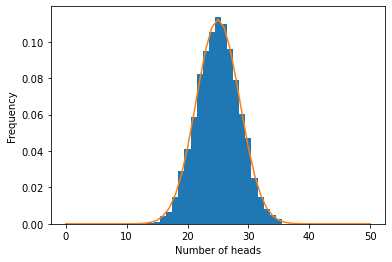

25.0366
3.4848042183170063


In [14]:
nheads_exp = []
ntests = 10000
nflips = 50
for i in range(ntests):
    iheads = get_nheads(nflips)
    nheads_exp.append(iheads)

plt.hist(nheads_exp, bins = (max(nheads_exp)-min(nheads_exp)), density = True, align='left')
plt.ylabel("Frequency")
plt.xlabel("Number of heads")

p = .5
x = np.array(range(nflips+1))
plt.plot(x, binom.pmf(x, nflips, p))

plt.show()

print(np.mean(nheads_exp))
print(np.std(nheads_exp))

In [ ]:
np.sqrt(nflips*p*(1-p))

In [ ]:
plt.ion()
fig1 = plt.figure(1, figsize=(12,6))
ax1 = fig1.add_subplot(121)
#ax2 = fig1.add_subplot(122)
fig1.canvas.draw()

nheads_exp = []
ntests = 100
nflips = 40

p = .5
x = np.array(range(nflips+1))
#ax2.set_ylabel("Binomial Probability: P(x)")
#ax2.set_xlabel("number of heads: x")
align='mid'
if nflips%2==0:
    align='left'
for i in range(ntests):
    iheads = get_nheads(nflips)
    nheads_exp.append(iheads)

    ax1.clear()
    ax1.hist(nheads_exp, range=(0,nflips), bins = nflips+1, density=True, align=align)
    ax1.plot(x, binom.pmf(x, nflips, p))
    ax1.set_ylabel("Relative Frequency")
    ax1.set_xlabel("Number of heads")
    fig1.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.05)


How do you think the mean and variance of this distribution compares with our ideal case?

In [ ]:
print("mean = ",np.mean(nheads_exp))
print("std. dev. = ",np.std(nheads_exp))

## Judging the fairness of a coin

Now how can we determine if a coin is fair?

In [15]:
def get_nheads_weighted(nflips, weight):
    nheads = 0
    for i in range(nflips):
        if np.random.random() > weight:
            nheads += 1
    return nheads

Number of heads = 4


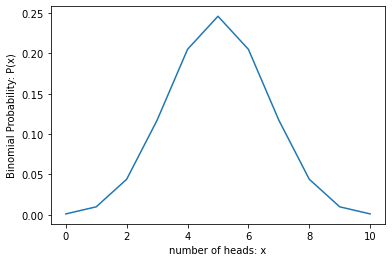

Fair coin: ave. nheads = 5.0, sigma = 1.5811388300841898
Nheads between 1 and 8
Prob. to be fair =  0.9443359375000009


In [76]:
fairness_weight = 0.45

nflips = 10

nheads = get_nheads_weighted(nflips, fairness_weight)
print("Number of heads =",nheads)

p = .5
x = np.array(range(nflips+1))
plt.plot(x, binom.pmf(x, nflips, p))
plt.ylabel("Binomial Probability: P(x)")
plt.xlabel("number of heads: x")
plt.show()

fair_mean = nflips*p
fair_sigma = np.sqrt(fair_mean*(1-p))

print("Fair coin: ave. nheads = {}, sigma = {}".format(fair_mean,fair_sigma))

lowx = int(fair_mean-2*fair_sigma)
highx = int(fair_mean+2*fair_sigma)

bsum = 0
for x in range(lowx, highx):
    bsum += binom.pmf(x, nflips, p)

print("Nheads between {} and {}".format(lowx,highx))
print("Prob. to be fair = ",bsum)


## Running many tests

What if we tried running this test of our coin many times? 

Can we do a better job testing our coin this way?

In [25]:
def get_tests(ntests, nflips):
    nheads_exp = []
    for i in range(ntests):
        iheads = get_nheads(nflips)
        nheads_exp.append(iheads)

    return nheads_exp

In [26]:
def get_weighted_tests(ntests, nflips, weight):
    nheads_exp = []
    for i in range(ntests):
        iheads = get_nheads_weighted(nflips, weight)
        nheads_exp.append(iheads)

    return nheads_exp

Mean number of heads = 54.98, sigma_e = 4.913817253419179
Fair coin: ave. nheads = 50.0, sigma = 5.0
Nheads between 40 and 60
2-sigma prob. to be fair =  0.9647997997822668


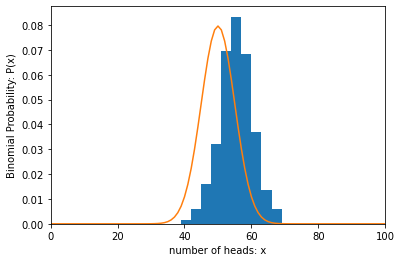

Uncertainty on the mean = 0.15538854526637413


In [82]:
fairness_weight = 0.45

nflips = 100
ntests = 1000

nheads = get_weighted_tests(ntests, nflips, fairness_weight)
print("Mean number of heads = {}, sigma_e = {}".format(np.mean(nheads),np.std(nheads)))

p = .5
x = np.array(range(nflips+1))
plt.hist(nheads,density=True)
plt.plot(x, binom.pmf(x, nflips, p))
plt.ylabel("Binomial Probability: P(x)")
plt.xlabel("number of heads: x")

fair_mean = nflips*p
fair_sigma = np.sqrt(fair_mean*(1-p))

print("Fair coin: ave. nheads = {}, sigma = {}".format(fair_mean,fair_sigma))

bsum = 0
for x in range(int(fair_mean-2*fair_sigma), int(fair_mean+2*fair_sigma)+1):
    bsum += binom.pmf(x, nflips, p)

print("Nheads between {} and {}".format(int(fair_mean-2*fair_sigma),int(fair_mean+2*fair_sigma)))
print("2-sigma prob. to be fair = ",bsum)

plt.xlim(int(fair_mean-10*fair_sigma),int(fair_mean+10*fair_sigma))
plt.show()
print("Uncertainty on the mean =", np.std(nheads)/np.sqrt(ntests))

Mean number of heads = 49.888
Fair coin: ave. nheads = 50.0, sigma = 5.0
Nheads between 40 and 60
2-sigma prob. to be fair =  0.9647997997822668


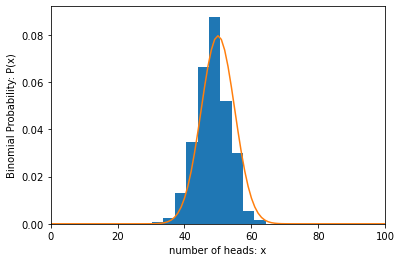

In [81]:
nflips = 100
ntests = 1000

nheads = get_tests(ntests, nflips)
print("Mean number of heads =",np.mean(nheads))

p = .5
x = np.array(range(nflips+1))
plt.hist(nheads,density=True,align='left')
plt.plot(x, binom.pmf(x, nflips, p))
plt.ylabel("Binomial Probability: P(x)")
plt.xlabel("number of heads: x")

fair_mean = nflips*p
fair_sigma = np.sqrt(fair_mean*(1-p))

print("Fair coin: ave. nheads = {}, sigma = {}".format(fair_mean,fair_sigma))

bsum = 0
for x in range(int(fair_mean-2*fair_sigma), int(fair_mean+2*fair_sigma)+1):
    bsum += binom.pmf(x, nflips, p)

print("Nheads between {} and {}".format(int(fair_mean-2*fair_sigma),int(fair_mean+2*fair_sigma)))
print("2-sigma prob. to be fair = ",bsum)

plt.xlim(int(fair_mean-10*fair_sigma),int(fair_mean+10*fair_sigma))
plt.show()


## Running many experiments (each experiment being many tests)

What if we tried running this same experiment many times? 

Can we do a better job testing our coin this way?

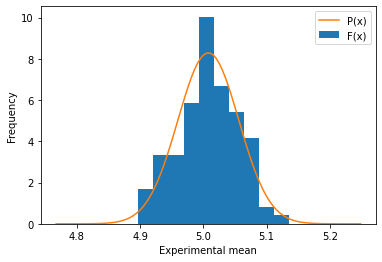

Average of the distributions of mean number of heads = 5.00793 +/- 0.048114084216578416


In [73]:
ntests = 1000
nflips = 10
test_means = []
nexperiments = 100

#plt.ion()
#fig1 = plt.figure(figsize=(12,5))
#ax1 = fig1.add_subplot(121)
#fig1.canvas.draw()

for i in range(nexperiments):
    nheads_exp = get_tests(ntests, nflips)
    test_means.append(np.mean(nheads_exp))

#    ax1.clear()
#    ax1.hist(test_means, bins = nflips, density=True)
#    ax1.set_ylabel("Relative Frequency")
#    ax1.set_xlabel("Mean number of heads")
#    fig1.canvas.draw()
#    display.display(plt.gcf())
#    display.clear_output(wait=True)
#    time.sleep(0.05)
mu = np.mean(test_means)
sigma = np.std(test_means)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
plt.hist(test_means, bins = nflips, density=True, label="F(x)")
plt.plot(x,y, label="P(x)")
plt.ylabel("Frequency")
plt.xlabel("Experimental mean")
plt.legend()
plt.show()

print("Average of the distributions of mean number of heads = {} +/- {}".format(mu,sigma))

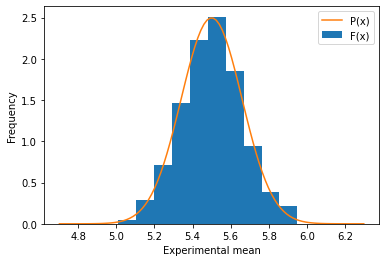

Average of the distributions of mean number of heads = 5.49993 +/- 0.15975385785639107


In [75]:
ntests = 100
nflips = 10
test_means = []
nexperiments = 1000

weight = 0.45

for i in range(nexperiments):
    nheads_exp = get_weighted_tests(ntests, nflips, weight)
    test_means.append(np.mean(nheads_exp))

mu = np.mean(test_means)
sigma = np.std(test_means)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
plt.hist(test_means, bins = nflips, density=True, label="F(x)")
plt.plot(x,y, label="P(x)")
plt.ylabel("Frequency")
plt.xlabel("Experimental mean")
plt.legend()
plt.show()

print("Average of the distributions of mean number of heads = {} +/- {}".format(mu,sigma))

In [ ]:
    #ax1.hist(nheads_exp, bins = (max(nheads_exp)-min(nheads_exp)))
    #ax1.set_ylabel("Frequency")
    #ax1.set_xlabel("Number of heads")
    #plt.show()
    #plt.draw()
    #plt.pause(0.1)
